# Семинар 7

In [134]:
import numpy as np
import plotly.express as px
from statsmodels.api import tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

## Симуляции моделей трендов

In [106]:
# Детерминированный тренд
det_values = np.arange(300) + np.random.normal(scale = 10,size = 300)

fig = px.line(x=np.arange(300), y=det_values);
fig.update_layout(title='Deterministic trend',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

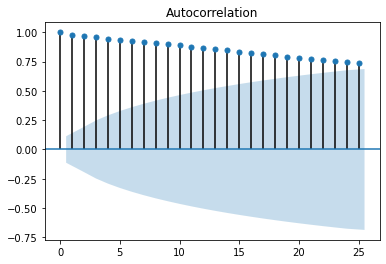

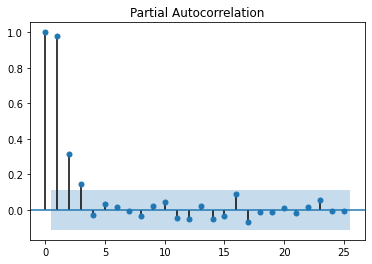

In [107]:
plot_acf(det_values);
plot_pacf(det_values);

In [141]:
# Стохастический тренд

stoch_values = np.zeros(300)
for i in range(1, 300):
    stoch_values[i] = stoch_values[i-1] + np.random.normal(scale=5)

fig = px.line(x=np.arange(300), y=stoch_values);
fig.update_layout(title='Stochastic trend',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

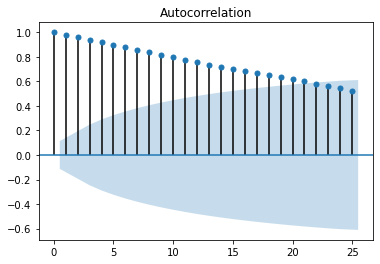

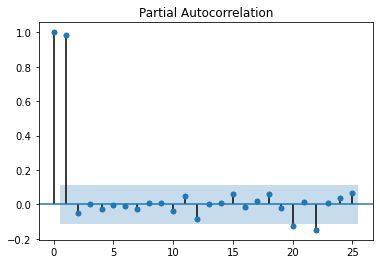

In [108]:
plot_acf(stoch_values);
plot_pacf(stoch_values);

## Переход к разностям

In [110]:
## Детерминированный тренд
fig = px.line(x=np.arange(299), y=np.diff(det_values))
fig.update_layout(title='Deterministic trend',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

In [143]:
# Стохастический тренд
fig = px.line(x=np.arange(298), y=np.diff(stoch_values))
fig.update_layout(title='Stochastic trend',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

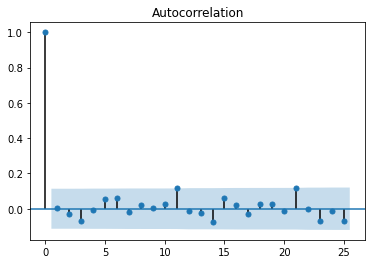

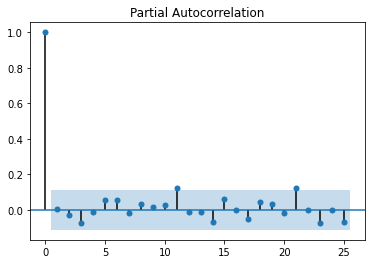

In [114]:
plot_acf(np.diff(stoch_values));
plot_pacf(np.diff(stoch_values));

In [152]:
invest = np.log(pd.read_csv('data_seminars/invest_index.csv').invest)
invest

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
269    5.749074
270    5.659134
271    5.716370
272    5.757639
273    5.938327
Name: invest, Length: 274, dtype: float64

In [153]:
fig = px.line(x=invest.index, y=invest.values)
fig.update_layout(title='Investment index',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

In [154]:
fig = px.line(x=invest.index[1:], y=np.diff(invest.values,n=1))
fig.update_layout(title='Investment index',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

In [155]:
seasonal_diff = invest.values[12:] - invest.values[:-12]

In [156]:
fig = px.line(x=invest.index[12:], y=seasonal_diff)
fig.update_layout(title='Investment index',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

In [157]:
fig = px.line(x=invest.index[13:], y=np.diff(seasonal_diff))
fig.update_layout(title='Investment index',
                   xaxis_title='Time',
                   yaxis_title='Value');
fig.update_xaxes(rangeslider_visible=True);
fig.show()

In [159]:
np.diff(seasonal_diff)

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        3.06600646e-01,  7.48502471e-02, -1.14099778e-01, -2.94974076e-02,
        6.22050454e-02,  3.02581171e-02,  5.48649941e-03,  6.19693685e-02,
        4.32954488e-02, -8.65352225e-02,  2.05516479e-01,  1.61598249e-01,
       -2.90124618e-01,  8.24755169e-02, -8.46415856e-02, -1.44729088e-01,
        4.29261650e-02,  4.70443260e-02,  2.02977481e-02,  6.12002103e-02,
       -1.02749213e-01, -1.48771677e-01, -9.55566099e-02,  1.39564689e-01,
        2.85990376e-02,  6.68660871e-02,  2.91930863e-02, -2.29885159e-03,
        5.11993357e-02,  

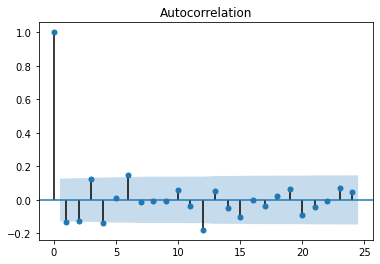

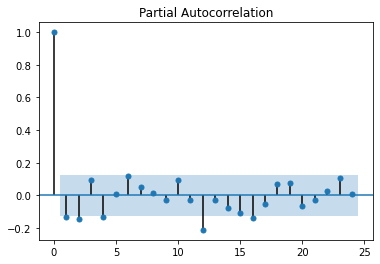

In [163]:


plot_acf(np.diff(seasonal_diff)[~np.isnan(np.diff(seasonal_diff))]);
plot_pacf(np.diff(seasonal_diff)[~np.isnan(np.diff(seasonal_diff))]);


In [166]:
mod = statsmodels.tsa.arima.model.ARIMA(invest.values, order = (0,1,1), seasonal_order=(0, 1, 0, 12))
res = mod.fit()
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  274
Model:             ARIMA(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 237.848
Date:                           Tue, 03 Nov 2020   AIC                           -471.697
Time:                                   10:51:15   BIC                           -464.568
Sample:                                        0   HQIC                          -468.831
                                           - 274                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1753      0.037     -4.802      0.000      -0.247      -0.104
sigma2         0.0033      0.000     19.866

In [167]:
px.line(res.resid)